## 1. Loading the Data:

In [1]:
# import libraries that will be used
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read csv file
df = pd.read_csv(r"C:\Users\adiya\Documents\Uni\Data Science\1SA-Final-Project\US-Superstore.csv")

## 2. Understanding the Data:

In [3]:
# display the first 5 rows for a quick look
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
# check the shape of the DataFrame (rows, columns)
# understand the amount of data
df.shape

(9994, 21)

In [5]:
# description of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
# the methods below calculate the number of missing values in each feature
# as seen in info all instances are not null
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### Features in the DataFrame:

##### *Understanding the features helps gain insight*

0. Row ID: Serial Number
1. Order ID: ID created when a product order is placed
2. Order Date: Date when the order was first placed
3. Ship Date: Date of shipment
4. Ship Mode: Shipment class
5. Customer ID: ID assigned to each customer who places an order
6. Customer Name: Name of customer
7. Segment: Type of client making the purchase
8. Country: Country of sales (US in this dataset)
9. City: City in the US
10. Postal Code: Zip code
11. Region: Region in the US
12. Product ID: ID of each product
13. Category: Main category of product
14. Sub-Category: Secondary or subordinate category
15. Product Name: Name of product
16. Sales: Product selling price
17. Quantity: Number of available products
18. Discount: Discount available for product
19. Profit: Profit gained from sale

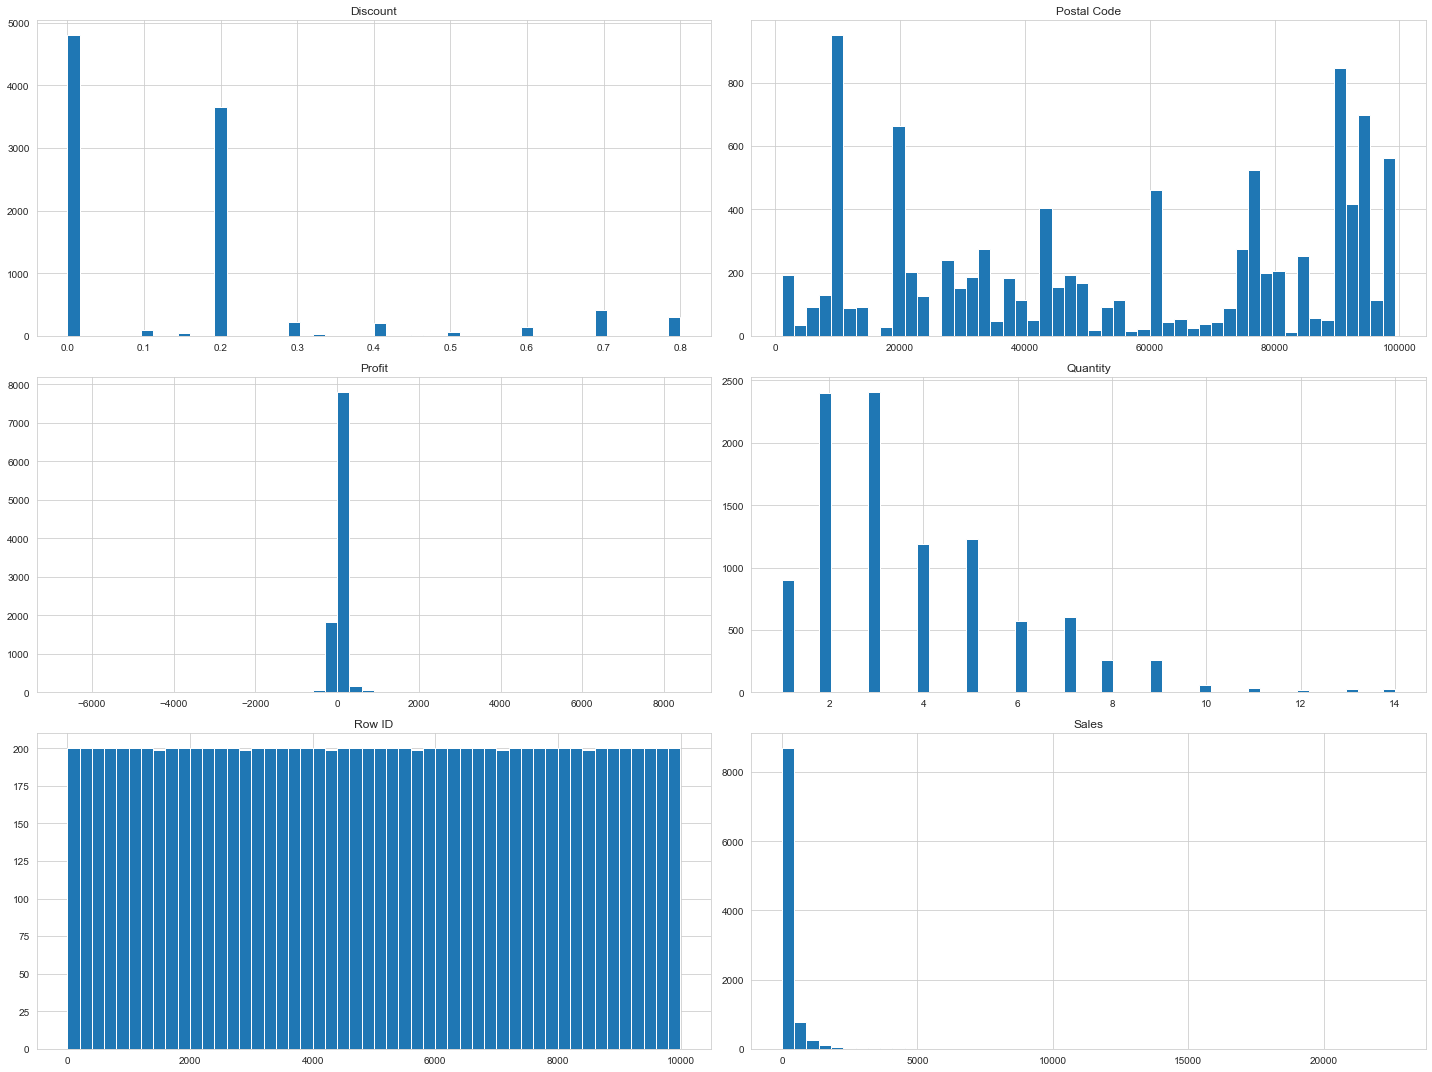

In [7]:
# a histogram plot for each numerical attribute
sns.set_style(style='whitegrid')
df.hist(bins=50, figsize=(20,15));
plt.tight_layout()
plt.show()

## 3. Cleaning the Data:

In [8]:
# creating a deep copy of the DataFrame
# current changes will be made on the copied version
df1 = df.copy()

In [9]:
# checking if the 'Row ID' matched the number of instances
df1['Row ID'].unique()

array([   1,    2,    3, ..., 9992, 9993, 9994], dtype=int64)

In [10]:
# setting 'Row ID' as DataFrame index
df1.set_index(['Row ID'], inplace=True)

In [11]:
# comparing number of unique values
print("Number of unique countries:", df['Country'].unique().size, df['Country'].unique())
print("Number of unique cities:", df['City'].unique().size)
print("Number of unique regions:", df['Region'].unique().size)

Number of unique countries: 1 ['United States']
Number of unique cities: 531
Number of unique regions: 4


> The dataset only includes purchases made in the United States. This is also shown in the code above.
> With this knowledge, it is clear that the column is useless and can be removed.

In [12]:
# dropping 'Country' column
df1.drop(['Country'], axis=1, inplace=True)
# examining the changes
df1.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [13]:
print("Number of unique Customer ID's:", df['Customer ID'].unique().size)
print("Number of unique Customer Name's:", df['Customer Name'].unique().size)

Number of unique Customer ID's: 793
Number of unique Customer Name's: 793


> The number of Customer ID's and names are identical. Additionally, by looking at the
> DataFrame it seems that the customers initials are included in the ID.
> The Customer ID provides a better indication since various customers could have
> the same name. Given that both columns also provide the same information, the
> Customer Name column is unnecessary.


In [14]:
# dropping 'Customer Name' column
df1.drop(['Customer Name'], axis=1, inplace=True)
# examining the changes
df1.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
